# Case Study: CA Housing Price

Let's use the California Housing Prices dataset to create a Regularization tutorial for regression analysis. We will perform Ridge, Lasso, and ElasticNet regularization techniques to handle overfitting in a linear regression model.

This tutorial demonstrates the use of different regularization techniques (Ridge, Lasso, ElasticNet) for regression analysis on the California Housing Prices dataset. Users will be able to understand how regularization helps in controlling overfitting and improving the generalization of linear regression models. They can further explore other real-world datasets and apply different regularization strategies to improve the performance of regression models effectively.

## Setup
We'll start by importing the necessary libraries for data manipulation, visualization, and regression analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

## Load and Prepare the Dataset
Next, we'll load the California Housing Prices dataset and prepare it for regression analysis.

In [2]:
# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression (Baseline)
Let's start with a simple linear regression model as a baseline.

In [3]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred)
linear_r2_test = r2_score(y_test, y_test_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression (Baseline):")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")

Linear Regression (Baseline):
Training R-squared: 0.6126, Training MSE: 0.5179
Testing R-squared: 0.5758, Testing MSE: 0.5559


## Polynomial Regression
Next, let's perform Polynomial Regression with different degrees.

In [4]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Regression:
Best Degree: 2
Training R-squared Scores: [0.6852681982344955, 0.7441415681335484, 0.7893228446487623]
Testing R-squared Scores: [0.6456819729261993, -18.38870805824376, -11476.104199556028]


## Ridge Regression
Now, let's perform Ridge regression with different alpha values.

In [5]:
# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 30, 50]

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create and fit the Ridge regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

# Find the best alpha based on the testing R-squared score
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]

print(f"\nRidge Regression:")
print(f"Best Alpha: {best_alpha_ridge:.4f}")
print(f"Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Testing R-squared Scores: {ridge_r2_test_scores}")


Ridge Regression:
Best Alpha: 50.0000
Training R-squared Scores: [0.6852681982309978, 0.6852681978848241, 0.6852681633541837, 0.685264794671512, 0.6849940748677958, 0.6835523857209695, 0.6816443257072511]
Testing R-squared Scores: [0.645683225805463, 0.6456944994374068, 0.6458070098960799, 0.6469096540340296, 0.6558501677207123, 0.6655692803640729, 0.6672535561033242]


## Lasso Regression
Next, let's perform Lasso regression with different alpha values.

In [6]:
# Create and fit the Lasso regression models with different alpha values
lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

# Find the best alpha based on the testing R-squared score
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]

print(f"\nLasso Regression:")
print(f"Best Alpha: {best_alpha_lasso:.4f}")
print(f"Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Testing R-squared Scores: {lasso_r2_test_scores}")


Lasso Regression:
Best Alpha: 0.0010
Training R-squared Scores: [0.6830030979089348, 0.6305732853769765, 0.5009816748171558, 0.03322000872409747, 0.0, 0.0, 0.0]
Testing R-squared Scores: [0.6686741743527673, 0.533056472931783, 0.4823562161721351, 0.032132551538488596, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794]


/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+02, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


## ElasticNet Regression
Finally, let's perform ElasticNet regression with different alpha and l1_ratio values.

In [7]:
# ElasticNet parameters (alpha and l1_ratio values)
alphas_elasticnet = [0.001, 0.01, 0.1, 1, 10, 50]
l1_ratios = [0.2, 0.5, 0.7, 0.9]

# Create and fit the ElasticNet regression models with different alpha and l1_ratio values
elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas_elasticnet:
    for l1_ratio in l1_ratios:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

# Find the best alpha and l1_ratio based on the testing R-squared score
best_alpha_elasticnet, best_l1_ratio_elasticnet = \
    alphas_elasticnet[np.argmax(elasticnet_r2_test_scores) // len(l1_ratios)], \
    l1_ratios[np.argmax(elasticnet_r2_test_scores) % len(l1_ratios)]

print(f"\nElasticNet Regression:")
print(f"Best Alpha: {best_alpha_elasticnet:.4f}, Best l1_ratio: {best_l1_ratio_elasticnet:.1f}")
print(f"Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"Testing R-squared Scores: {elasticnet_r2_test_scores}")

/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
/Users/yasuomaidana/Projects/data-analysis/regression-analysis/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not c


ElasticNet Regression:
Best Alpha: 0.0010, Best l1_ratio: 0.9
Training R-squared Scores: [0.6840310978294589, 0.6837217689230024, 0.6834122448233106, 0.6831585830280078, 0.6641895730066483, 0.654089814353995, 0.6463124687609252, 0.6364839821265846, 0.5619051580675156, 0.5325527976563843, 0.5104019630875991, 0.5043656964193155, 0.3174625276332542, 0.2114852613424184, 0.08567216955936541, 0.05311242187826348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Testing R-squared Scores: [0.6651313846713924, 0.667276826941704, 0.6679746333269321, 0.668749687302107, 0.5953794418651253, 0.5348954203373627, 0.5324894830873415, 0.535441360238432, 0.5437773103890866, 0.5153003945070083, 0.49307869728746057, 0.4864961977437864, 0.30776990091131107, 0.20586251683364998, 0.0831325334530787, 0.05149664176347912, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794, -0.00021908714592466794]


## Visualization
You can visualize the R-squared scores for different regularization techniques.


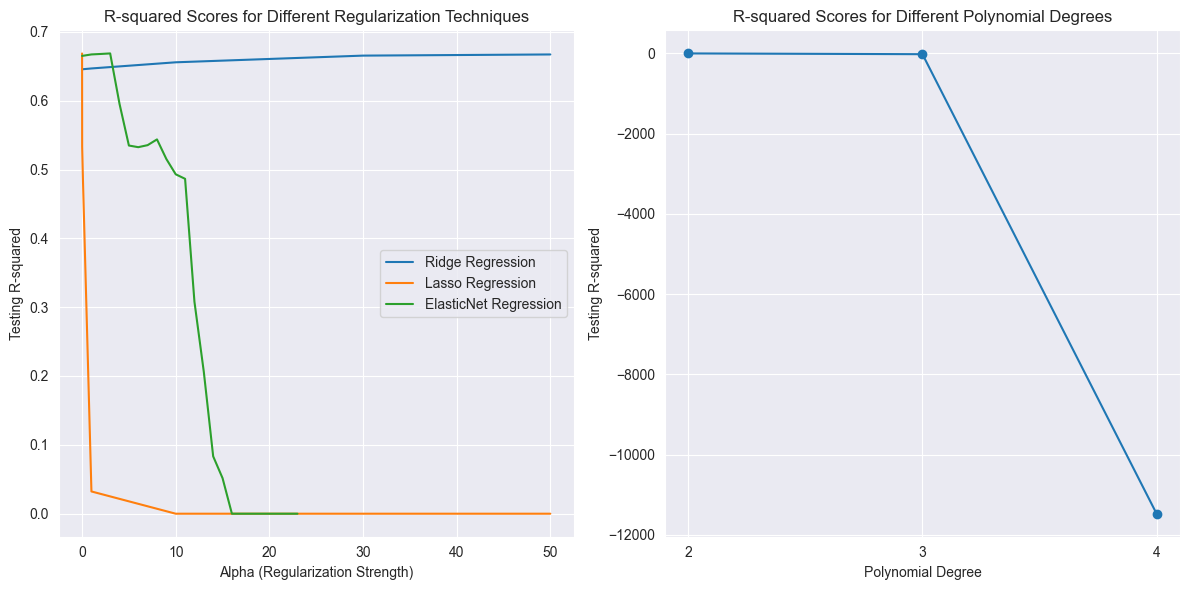

In [8]:
# Plotting R-squared scores for different regularization techniques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_r2_test_scores, label="Ridge Regression")
plt.plot(alphas, lasso_r2_test_scores, label="Lasso Regression")
plt.plot(elasticnet_r2_test_scores, label="ElasticNet Regression")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Testing R-squared")
plt.title("R-squared Scores for Different Regularization Techniques")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, polynomial_r2_test_scores, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Testing R-squared")
plt.title("R-squared Scores for Different Polynomial Degrees")
plt.xticks(degrees)
plt.tight_layout()
plt.show()